In [2]:
#import library
import numpy as np
import pandas as pd

#read data
data = pd.read_csv('data/dataset.csv')

In [7]:
data.head()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.shape

(500, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


c:\Users\WAYCOM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


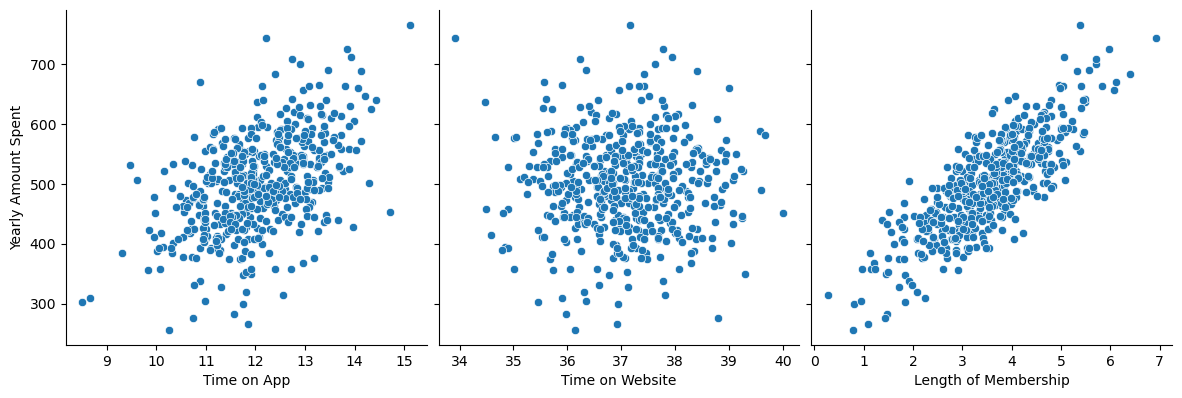

In [12]:
sns.pairplot(data, x_vars=['Time on App','Time on Website','Length of Membership',],
             y_vars='Yearly Amount Spent',size=4, aspect=1, kind='scatter')
plt.show()

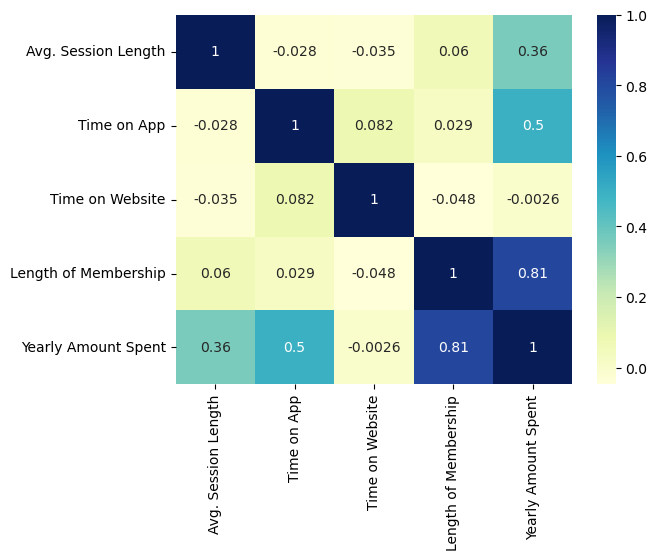

In [14]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
x = data['Length of Membership']
y = data['Yearly Amount Spent']

In [28]:
#pembagian data latih dan data uji proporsi 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size = 0.3, random_state = 10)

In [29]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [30]:
lr.params

const                   277.836126
Length of Membership     62.111568
dtype: float64

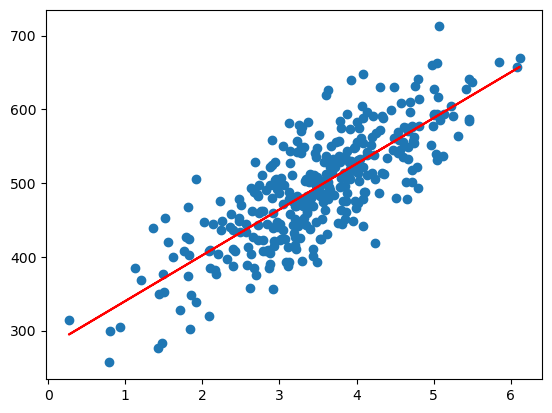

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.params['const']+lr.params['Length of Membership']*x_train,'r')
plt.show()

In [27]:
#prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(x_train_sm)

#counting residual
res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

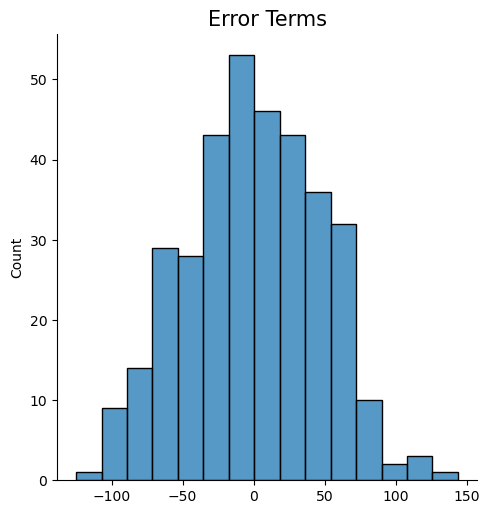

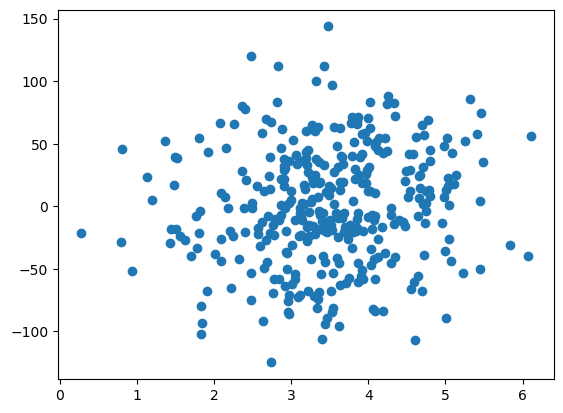

In [33]:
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.show()

plt.scatter(x_train, res)
plt.show()

In [34]:
#prediksi data uji
x_test_sm   = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

#Hitung nilai R2
from sklearn.metrics import r2_score



In [ ]:
r_squared = r2_score(y_test, y_test_pred)

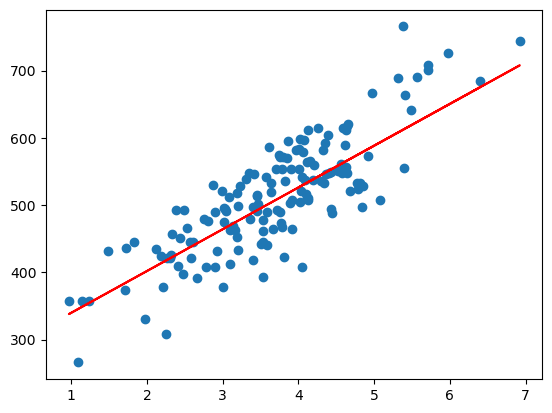

In [35]:
#visualisasi hasil
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')
plt.show()